# Modelado estadístico

> "**patsy**: es un libreria de Python para describir modelos estadísticos (especialmente modelos lineales o modelos que tienen un componente lineal) y matrices de diseño de construcción. Está estrechamente inspirado y es compatible con el minilenguaje de fórmula utilizado en R y S."

> "**statsmodels** es un módulo de Python que proporciona clases y funciones para la estimación de muchos modelos estadísticos diferentes, así como para realizar pruebas estadísticas y exploración de datos estadísticos."

In [1]:
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
y = np.array([1, 2, 3, 4, 5, 6])
x1 = np.array([6, 7, 8, 9, 10, 11])
x2 = np.array([12, 13, 14, 15, 16, 17])

In [3]:
n_data = len(y)
X = np.vstack([np.ones(n_data), x1, x2, x1*x2]).T
X

array([[  1.,   6.,  12.,  72.],
       [  1.,   7.,  13.,  91.],
       [  1.,   8.,  14., 112.],
       [  1.,   9.,  15., 135.],
       [  1.,  10.,  16., 160.],
       [  1.,  11.,  17., 187.]])

## Regresión con numpy

In [4]:
# Regresa los estimadores, los residuales, el rango de la Matrix X y valores singulares de X
beta, res, rank, sval = np.linalg.lstsq(X, y)

C:\Users\ALEJAN~1\AppData\Local\Temp/ipykernel_17364/3940827167.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta, res, rank, sval = np.linalg.lstsq(X, y)


In [5]:
beta

array([-0.42105263,  1.76315789, -0.76315789,  0.        ])

In [6]:
res

array([], dtype=float64)

In [7]:
rank

3

In [8]:
sval

array([3.26329139e+02, 6.94721868e+00, 1.70242507e-01, 2.05202109e-16])

## Modelando con patsy

In [9]:
data = {"y": y, "x1": x1, "x2": x2}
y, X = patsy.dmatrices("y ~ 1 + x1 + x2 + x1*x2", data)

In [10]:
y

DesignMatrix with shape (6, 1)
  y
  1
  2
  3
  4
  5
  6
  Terms:
    'y' (column 0)

In [11]:
X

DesignMatrix with shape (6, 4)
  Intercept  x1  x2  x1:x2
          1   6  12     72
          1   7  13     91
          1   8  14    112
          1   9  15    135
          1  10  16    160
          1  11  17    187
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)
    'x1:x2' (column 3)

In [12]:
type(X)

patsy.design_info.DesignMatrix

In [13]:
np.array(X)

array([[  1.,   6.,  12.,  72.],
       [  1.,   7.,  13.,  91.],
       [  1.,   8.,  14., 112.],
       [  1.,   9.,  15., 135.],
       [  1.,  10.,  16., 160.],
       [  1.,  11.,  17., 187.]])

**Retornando las matrices en dataframes**

In [14]:
df_data = pd.DataFrame(data)
y, X = patsy.dmatrices("y ~ 1 + x1 + x2 + x1:x2", df_data, return_type="dataframe")

In [15]:
y

,y
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0
5,6.0


In [16]:
X

,Intercept,x1,x2,x1:x2
0,1.0,6.0,12.0,72.0
1,1.0,7.0,13.0,91.0
2,1.0,8.0,14.0,112.0
3,1.0,9.0,15.0,135.0
4,1.0,10.0,16.0,160.0
5,1.0,11.0,17.0,187.0


## Regresión con statsmodels

In [17]:
model = sm.OLS(y, X)

In [18]:
model

In [19]:
result = model.fit()
result.params

Intercept   -4.210526e-01
x1           1.763158e+00
x2          -7.631579e-01
x1:x2       -1.276756e-15
dtype: float64

## Simulando un dataset

In [20]:
n_data = 100
x1 = np.random.randn(n_data)
x2 = np.random.randn(n_data)
data = pd.DataFrame({"x1": x1, "x2": x2})
def y_true(x1, x2):
    return 1 + 1 * x1 + 2 * x2 + 3 * x1 * x2

data["y_true"] = y_true(x1, x2)

In [21]:
data.head()

,x1,x2,y_true
0,-0.336968,0.253022,0.913294
1,0.664945,0.717603,4.531648
2,3.797675,0.453651,10.873436
3,0.139066,-0.864348,-0.950235
4,-0.191392,-1.664026,-1.564000


In [22]:
# Agregando un poco de ruido blanco
e = np.random.randn(n_data)
data["y"] = data["y_true"] + e #Observaciones reales

In [23]:
data.head()

,x1,x2,y_true,y
0,-0.336968,0.253022,0.913294,-1.166445
1,0.664945,0.717603,4.531648,5.406218
2,3.797675,0.453651,10.873436,11.009969
3,0.139066,-0.864348,-0.950235,-0.080583
4,-0.191392,-1.664026,-1.564000,-1.112338


### Probando primer modelo

Si queremos ajustar los datos al modelo

$$
Y = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2}
$$

In [24]:
model1 = smf.ols("y ~ x1 + x2", data)

In [25]:
model1

In [26]:
result1 = model1.fit()

In [27]:
result1

In [28]:
display(result1.summary()) 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     45.91
Date:                Sat, 05 Mar 2022   Prob (F-statistic):           9.34e-15
Time:                        12:08:42   Log-Likelihood:                -232.30
No. Observations:                 100   AIC:                             470.6
Df Residuals:                      97   BIC:                             478.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9489      0.253      3.753      0.000       0.447       1.451
x1             1.8346      0.267      6.882      0.000       1.305       2.364
x2             1.7300      0.240      7.198      0.000       1.253       2.207
==============================================================================
Omnibus:                       10.897   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               21.365
Skew:                           0.347   Prob(JB):                     2.29e-05
Kurtosis:                       5.156   Cond. No.                         1.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notemos que la visualizacion de summary es similar al comando summary(lm(model)) en R, esto es porque los desarrolladores se basaron en la logica en **R**


In [29]:
result1.rsquared # r^2 del modelo

0.4862797570268782

In [30]:
result1.resid # residuos del modelo

0    -1.934886
1     1.995971
2     2.309175
3     0.210735
4     1.168685
        ...   
95   -3.241354
96   -0.305476
97   -0.649519
98   -0.815539
99   -2.128918
Length: 100, dtype: float64

(array([ 2.,  2., 15., 24., 20., 20.,  9.,  6.,  0.,  2.]),
 array([-5.08837823, -3.70946097, -2.3305437 , -0.95162643,  0.42729083,
         1.8062081 ,  3.18512537,  4.56404263,  5.9429599 ,  7.32187717,
         8.70079443]),
 <BarContainer object of 10 artists>)

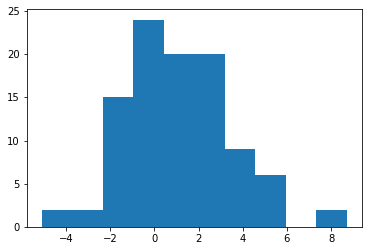

In [31]:
plt.hist(result1.fittedvalues.values)

In [32]:
result1.fittedvalues

0     0.768441
1     3.410247
2     8.700794
3    -0.291318
4    -2.281023
        ...   
95    1.293580
96    2.844545
97    2.221960
98    4.529861
99    1.439562
Length: 100, dtype: float64

**Prueba de normalidad**

$$
H_{o}: \textrm{Los residuos se distribuyen normalmente} \ \ \ \textrm{VS} \ \ \ H_{a}:\textrm{Los residuos no se distribuyen normalmente}
$$

In [33]:
z, p = stats.normaltest(result1.resid.values)

In [34]:
z

10.897311395859266

In [35]:
# Si el valor p es grande no se puede rechazar la hipotesis nula
# Si el valor p es menor al nivel de significancia se rechaza la hipotesis nula
p 

0.004302084105812508

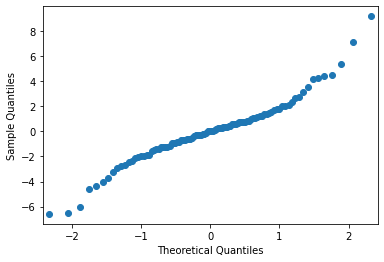

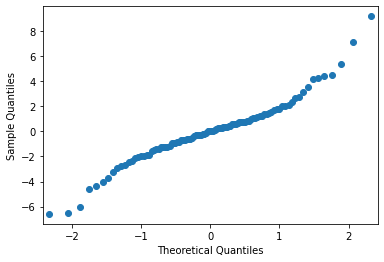

In [36]:
smg.qqplot(result1.resid.values)

### Probando segundo modelo

Si queremos ajustar los datos al modelo

$$
Y = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + \beta_{3}x_{1}x_{2}
$$

In [37]:
model2 = smf.ols("y ~ x1 + x2 + x1*x2", data)
result2 = model2.fit()

In [38]:
display(result2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     393.7
Date:                Sat, 05 Mar 2022   Prob (F-statistic):           8.55e-54
Time:                        12:09:03   Log-Likelihood:                -136.21
No. Observations:                 100   AIC:                             280.4
Df Residuals:                      96   BIC:                             290.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1273      0.098     11.559      0.000       0.934       1.321
x1             1.1582      0.106     10.884      0.000       0.947       1.369
x2             1.8655      0.093     20.148      0.000       1.682       2.049
x1:x2          2.6887      0.114     23.665      0.000       2.463       2.914
==============================================================================
Omnibus:                        3.502   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.174   Jarque-Bera (JB):                2.654
Skew:                          -0.257   Prob(JB):                        0.265
Kurtosis:                       2.389   Cond. No.                         1.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
result2.rsquared # r^2 del modelo

0.9248228926842109

In [40]:
z, p = stats.normaltest(result2.resid.values)

In [41]:
z

3.502008425791949

In [42]:
p

0.17359952500673068

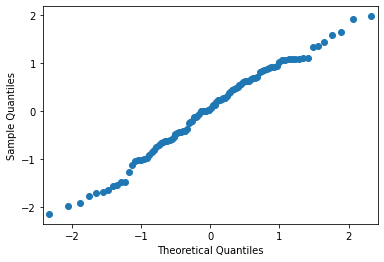

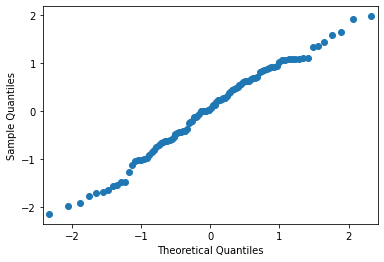

In [43]:
smg.qqplot(result2.resid.values)

In [44]:
result2.params # betas estimadas

Intercept    1.127323
x1           1.158210
x2           1.865535
x1:x2        2.688665
dtype: float64

### Prediciendo nuevos valores

In [45]:
x = np.linspace(-2, 2, 40)
X1, X2 = np.meshgrid(x, x)
new_data = pd.DataFrame({"x1": X1.ravel(), "x2": X2.ravel()})

In [46]:
new_data.head(25)

,x1,x2
0,-2.000000,-2.0
1,-1.897436,-2.0
2,-1.794872,-2.0
3,-1.692308,-2.0
4,-1.589744,-2.0
5,-1.487179,-2.0
6,-1.384615,-2.0
7,-1.282051,-2.0
8,-1.179487,-2.0
9,-1.076923,-2.0


In [47]:
new_data["predict_values"] = result2.predict(new_data) 

In [48]:
new_data.head()

,x1,x2,predict_values
0,-2.000000,-2.0,5.834491
1,-1.897436,-2.0,5.401761
2,-1.794872,-2.0,4.969031
3,-1.692308,-2.0,4.536301
4,-1.589744,-2.0,4.103570


In [49]:
result2.params

Intercept    1.127323
x1           1.158210
x2           1.865535
x1:x2        2.688665
dtype: float64

In [50]:
def y_predict(x1, x2):
    return 1.096514 + 0.900113* x1 + 1.953532 * x2 + 3.000828 * x1 * x2

In [51]:
new_data["predict_values_ownfunction"] = y_predict(new_data["x1"].values,new_data["x2"].values) 

In [52]:
new_data.head()

,x1,x2,predict_values,predict_values_ownfunction
0,-2.000000,-2.0,5.834491,7.392536
1,-1.897436,-2.0,5.401761,6.869301
2,-1.794872,-2.0,4.969031,6.346066
3,-1.692308,-2.0,4.536301,5.822830
4,-1.589744,-2.0,4.103570,5.299595


## Modelando el dataset Icecream del paquete Ecdat

In [53]:
dataset = sm.datasets.get_rdataset("Icecream", "Ecdat")

In [54]:
dataset.title

'Ice Cream Consumption'

In [55]:
dataset.data #dataframe 

,cons,income,price,temp
0,0.386,78,0.270,41
1,0.374,79,0.282,56
2,0.393,81,0.277,63
3,0.425,80,0.280,68
4,0.406,76,0.272,69
5,0.344,78,0.262,65
6,0.327,82,0.275,61
7,0.288,79,0.267,47
8,0.269,76,0.265,32
9,0.256,79,0.277,24


In [56]:
display(dataset.data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cons    30 non-null     float64
 1   income  30 non-null     int64  
 2   price   30 non-null     float64
 3   temp    30 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 1.1 KB


None

In [57]:
model1 = smf.ols("cons ~ -1 + price + temp", data=dataset.data)
result1 = model1.fit()
display(result1.summary()) 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   cons   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              1001.
Date:                Sat, 05 Mar 2022   Prob (F-statistic):                    9.03e-27
Time:                        12:09:31   Log-Likelihood:                          51.903
No. Observations:                  30   AIC:                                     -99.81
Df Residuals:                      28   BIC:                                     -97.00
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
price          0.7254      0.093      7.805      0.000       0.535       0.916
temp           0.0032      0.000      6.549      0.000       0.002       0.004
==============================================================================
Omnibus:                        5.350   Durbin-Watson:                   0.637
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                3.675
Skew:                           0.776   Prob(JB):                        0.159
Kurtosis:                       3.729   Cond. No.                         593.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
z, p_value = stats.normaltest(result1.resid.values)
print('p-valor is {}'.format(p_value))

p-valor is 0.06890907714419851


C:\Users\Alejandro Zavala\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

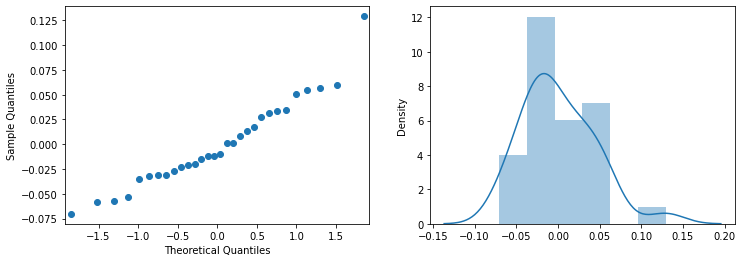

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
smg.qqplot(result1.resid.values,ax=ax1)
sns.distplot(result1.resid.values,ax=ax2)

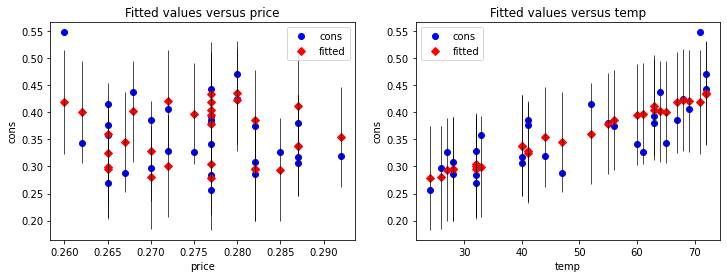

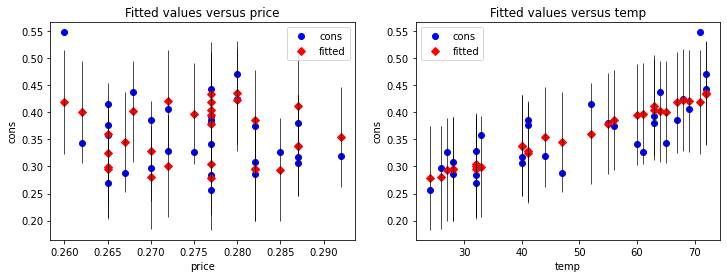

In [60]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
smg.plot_fit(result1, 0, ax=ax1)
smg.plot_fit(result1, 1, ax=ax2)

In [61]:
df_copy = dataset.data[["cons","price","temp"]].copy()
df_copy["Ajustados_cons"] = result1.fittedvalues

In [62]:
# Concateno el mismo dataframe pero ordenando los valores por precio y por temp (esto para ver la interpretacion d elp0s graficos)
pd.concat([df_copy.sort_values('price').reset_index(), df_copy.sort_values('temp').reset_index()], axis=1, join='inner')

,index,cons,price,temp,Ajustados_cons,index,cons,price,temp,Ajustados_cons
0,29,0.548,0.260,71,0.418849,9,0.256,0.277,24,0.278757
1,5,0.344,0.262,65,0.400842,11,0.298,0.270,26,0.280166
2,27,0.416,0.265,52,0.360858,23,0.326,0.285,27,0.294289
3,26,0.376,0.265,41,0.325185,24,0.309,0.282,28,0.295356
4,25,0.359,0.265,33,0.299240,10,0.286,0.282,28,0.295356
5,8,0.269,0.265,32,0.295997,22,0.284,0.277,32,0.304702
6,7,0.288,0.267,47,0.346094,8,0.269,0.265,32,0.295997
7,28,0.437,0.268,64,0.401951,12,0.329,0.272,32,0.301075
8,11,0.298,0.270,26,0.280166,25,0.359,0.265,33,0.299240
9,0,0.386,0.270,41,0.328812,13,0.318,0.287,40,0.337900


## Regresión logística

In [63]:
df = sm.datasets.get_rdataset("iris").data # Cargando dataset "iris"

In [64]:
df.info() # Es como un schema del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [65]:
df.head() # Veamos un vistazo rapido a los datos

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [66]:
df["Species"].unique() # Elementos unicos de la columna "Species"

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [67]:
df_bin = df[df.Species.isin(["versicolor", "virginica"])].copy().reset_index(drop=True)
# Filtramos el dataset para obtener solo dos variables y reseteamos el index (solo para mas presentacion)

In [68]:
df_bin["bin_species"] = df_bin["Species"].map({"versicolor": 1,
                                               "virginica": 0})

In [69]:
df_bin.sample(n=10) # Muestra aleatoria de 10 (para verificar nueva columna agregada)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,bin_species
38,5.6,3.0,4.1,1.3,versicolor,1
56,4.9,2.5,4.5,1.7,virginica,0
0,7.0,3.2,4.7,1.4,versicolor,1
88,6.0,3.0,4.8,1.8,virginica,0
47,6.2,2.9,4.3,1.3,versicolor,1
17,5.8,2.7,4.1,1.0,versicolor,1
85,7.7,3.0,6.1,2.3,virginica,0
24,6.4,2.9,4.3,1.3,versicolor,1
34,5.4,3.0,4.5,1.5,versicolor,1
43,5.0,2.3,3.3,1.0,versicolor,1


In [70]:
df_bin.rename(columns={"Sepal.Length": "Sepal_Length",
                       "Sepal.Width": "Sepal_Width",
                       "Petal.Length": "Petal_Length",
                       "Petal.Width": "Petal_Width"},
              inplace=True)

In [71]:
df_bin.sample(n=10)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species,bin_species
45,5.7,3.0,4.2,1.2,versicolor,1
33,6.0,2.7,5.1,1.6,versicolor,1
73,6.3,2.7,4.9,1.8,virginica,0
79,7.2,3.0,5.8,1.6,virginica,0
66,6.5,3.0,5.5,1.8,virginica,0
26,6.8,2.8,4.8,1.4,versicolor,1
88,6.0,3.0,4.8,1.8,virginica,0
17,5.8,2.7,4.1,1.0,versicolor,1
89,6.9,3.1,5.4,2.1,virginica,0
81,7.9,3.8,6.4,2.0,virginica,0


In [72]:
model = smf.logit("bin_species ~ Petal_Length + Petal_Width", data=df_bin)

In [73]:
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.102818
         Iterations 10


In [74]:
display(result.summary()) # Ajuste del modelo mas inferencia en algunos parametros

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            bin_species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Sat, 05 Mar 2022   Pseudo R-squ.:                  0.8517
Time:                        12:09:53   Log-Likelihood:                -10.282
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 2.303e-26
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       45.2723     13.612      3.326      0.001      18.594      71.951
Petal_Length    -5.7545      2.306     -2.496      0.013     -10.274      -1.235
Petal_Width    -10.4467      3.756     -2.782      0.005     -17.808      -3.086
================================================================================

Possibly complete quasi-separation: A fraction 0.34 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [75]:
display(result.get_margeff().summary()) # Efectos marginales sobre cada variable

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:            bin_species
Method:                          dydx
At:                           overall
================================================================================
                  dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Petal_Length    -0.1736      0.052     -3.347      0.001      -0.275      -0.072
Petal_Width     -0.3151      0.068     -4.608      0.000      -0.449      -0.181
================================================================================
"""

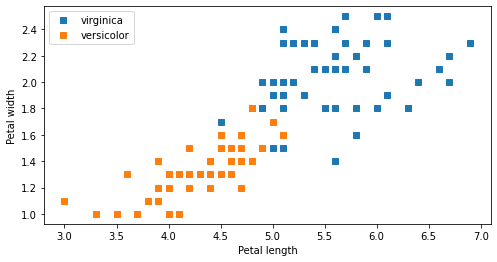

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
# species virginica
ax.plot(df_bin[df_bin["bin_species"] == 0].Petal_Length.values,df_bin[df_bin["bin_species"] == 0].Petal_Width.values,
's', label='virginica')
    
ax.plot(df_bin[df_bin["bin_species"] == 1].Petal_Length.values,
df_bin[df_bin["bin_species"] == 1].Petal_Width.values,'s', label='versicolor')
               
ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.legend()

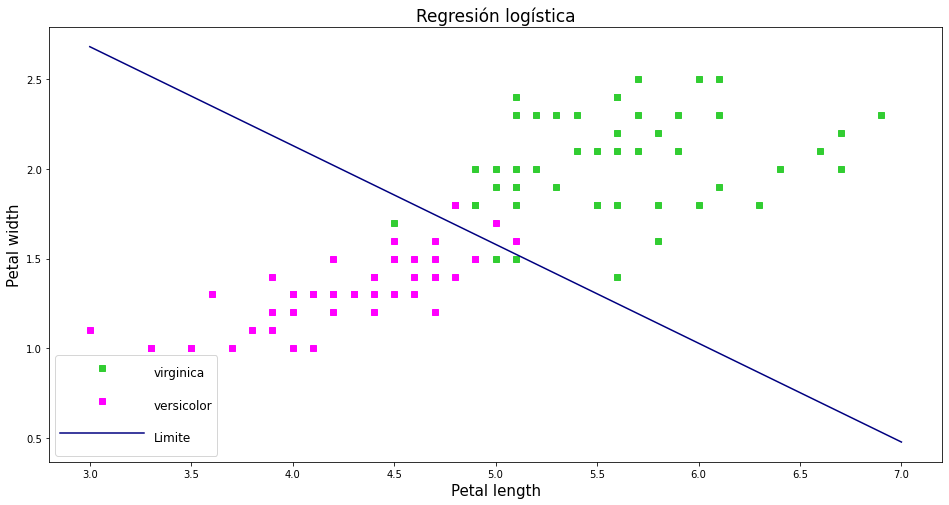

In [77]:
# Estimando 
params = result.params
alpha0 = -params['Intercept']/params['Petal_Width']
alpha1 = -params['Petal_Length']/params['Petal_Width']


# Viendo grafico de nuevo

fig, ax = plt.subplots(1, 1, figsize=(16, 8))

ax.set_title("Regresión logística",fontsize=17)

ax.plot(df_bin[df_bin["bin_species"] == 0]["Petal_Length"],
        df_bin[df_bin["bin_species"] == 0]["Petal_Width"],
        's',color="limegreen",label='virginica')
    
ax.plot(df_bin[df_bin["bin_species"] == 1]["Petal_Length"],
        df_bin[df_bin["bin_species"] == 1]["Petal_Width"],
        's',color="magenta",label='versicolor')


x_line = np.array([3.0, 7.0])
ax.plot(x_line, alpha0 + alpha1 * x_line,color="navy",label="Limite")

ax.set_xlabel('Petal length',fontsize=15)
ax.set_ylabel('Petal width',fontsize=15)
ax.legend(handlelength=7, handleheight=3,fontsize=12)

## Modelo de Poisson

In [78]:
dataset_disc = sm.datasets.get_rdataset("discoveries")

In [79]:
dataset_disc

<class 'statsmodels.datasets.utils.Dataset'>

In [80]:
dataset_disc.data.head()

,time,value
0,1860,5
1,1861,3
2,1862,0
3,1863,2
4,1864,0


In [81]:
df_disc = dataset_disc.data.rename(columns={"value":"discoveries"})

In [82]:
df_disc.head()

,time,discoveries
0,1860,5
1,1861,3
2,1862,0
3,1863,2
4,1864,0


<BarContainer object of 100 artists>

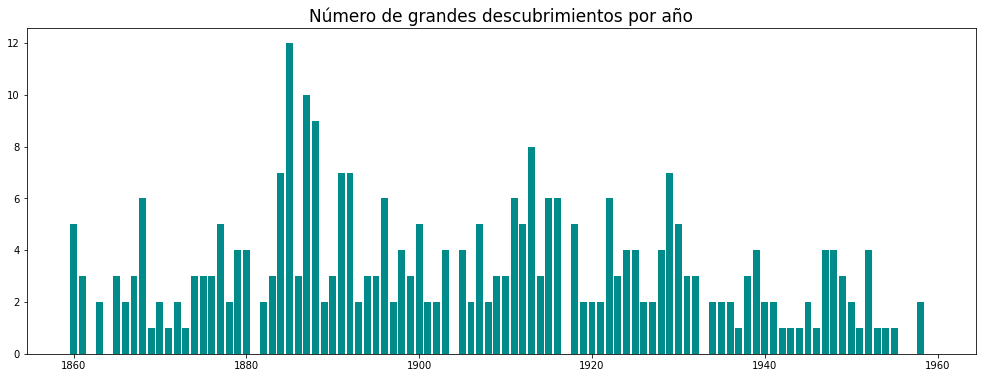

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(17, 6))
ax.set_title("Número de grandes descubrimientos por año",fontsize=17)
ax.bar(df_disc["time"], df_disc["discoveries"],color="darkcyan")

In [84]:
model = smf.poisson("discoveries ~ 1", data=df_disc)

In [85]:
result = model.fit()

Optimization terminated successfully.
         Current function value: 2.168457
         Iterations 1


In [86]:
display(result.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:            discoveries   No. Observations:                  100
Model:                        Poisson   Df Residuals:                       99
Method:                           MLE   Df Model:                            0
Date:                Sat, 05 Mar 2022   Pseudo R-squ.:                   0.000
Time:                        12:10:12   Log-Likelihood:                -216.85
converged:                       True   LL-Null:                       -216.85
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1314      0.057     19.920      0.000       1.020       1.243
==============================================================================
"""

In [87]:
lmbda_coef = np.exp(result.params)

In [88]:
lmbda_coef

Intercept    3.1
dtype: float64

In [89]:
X = stats.poisson(lmbda_coef)

In [90]:
result.conf_int()

,0,1
Intercept,1.020084,1.242721


In [91]:
X_ci_l = stats.poisson(np.exp(result.conf_int().values)[0, 0])
X_ci_u = stats.poisson(np.exp(result.conf_int().values)[0, 1])

In [92]:
print("Limite inferior: {} \n Limite superior: {}".format(X_ci_l,X_ci_u))

Limite inferior: <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022F99247A30> 
 Limite superior: <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022F99247AF0>


In [93]:
v, k = np.histogram(df_disc.values, bins=12, range=(0, 12),normed=True)

C:\Users\ALEJAN~1\AppData\Local\Temp/ipykernel_17364/1384229642.py:1: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  v, k = np.histogram(df_disc.values, bins=12, range=(0, 12),normed=True)


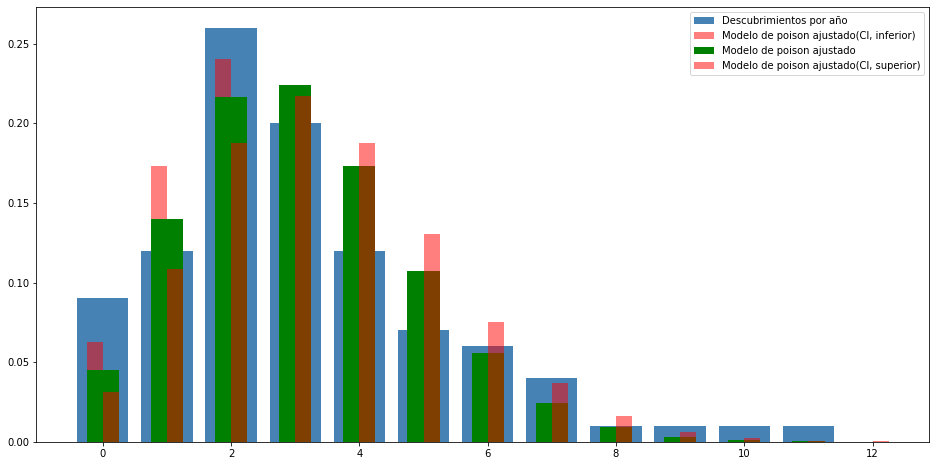

In [94]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

ax.bar(k[:-1], v, color="steelblue", align='center',
label='Descubrimientos por año')

ax.bar(k-0.125, X_ci_l.pmf(k), color="red", alpha=0.5,
align='center', width=0.25,label='Modelo de poison ajustado(CI, inferior)')

ax.bar(k, X.pmf(k), color="green", align='center', width=0.5,
label='Modelo de poison ajustado')

ax.bar(k+0.125, X_ci_u.pmf(k), color="red", alpha=0.5,
align='center', width=0.25,label='Modelo de poison ajustado(CI, superior)')

ax.legend()